In [1]:
import pandas as pd
import seaborn as sns

In [2]:
salaries = pd.read_csv('datascience_salaries.csv')

In [3]:
salaries.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


In [4]:
salaries.duplicated().sum() # checking for duplicates --> there are no duplicates in datasets

np.int64(0)

In [5]:
salaries.info() # checking for empty data in datacells --> there are no empty cells

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   object
 4   location          1171 non-null   object
 5   salary_currency   1171 non-null   object
 6   salary            1171 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 64.2+ KB


In [6]:
# counting new column salary_scalled by Min-Max normalization

salaries['salary_scalled'] = (salaries['salary'] - salaries['salary'].min()) / (salaries['salary'].max() - salaries['salary'].min()) 

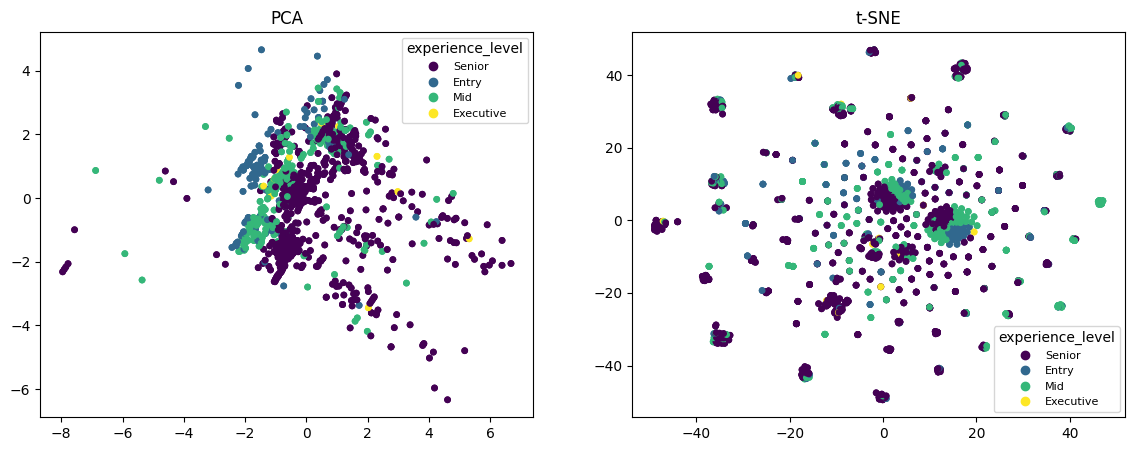

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Choosing target — dots on the chart that will be painted
y = salaries['experience_level']

# Delete the target from dataset x to not influence on results
X = salaries.drop(['experience_level'], axis=1)

# Separate numerical and categorical features
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# One-hot encoding for categorical features
preprocess = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

X_encoded = preprocess.fit_transform(X)

# Zooming
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded.toarray())

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    random_state=42
)
X_tsne = tsne.fit_transform(X_scaled)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(y)[0], s=15)
axes[0].set_title("PCA")

axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=pd.factorize(y)[0], s=15)
axes[1].set_title("t-SNE")

## Legend for PCA
scatter = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(y)[0], s=15)
# Making legends
handles, _ = scatter.legend_elements()
# Unique categories for y
labels = pd.unique(y)
axes[0].legend(handles, labels, title="experience_level", fontsize=8)

## Legend for t-SNE
scatter_tsne = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=pd.factorize(y)[0], s=15)
# Making legends
handles_tsne, _ = scatter_tsne.legend_elements()
# Unique categories for y
labels_tsne = pd.unique(y)
axes[1].legend(handles_tsne, labels_tsne, title="experience_level", fontsize=8)

plt.show()


In [14]:
# grouping salary mean by experience level

salary_mean = salaries.groupby('experience_level')['salary'].mean().reset_index()

salary_mean

,experience_level,salary
0,Entry,36111.111111
1,Executive,76076.923077
2,Mid,51786.885246
3,Senior,75088.033012


In [15]:
# grouping salary median by experience level

salary_median = salaries.groupby('experience_level')['salary'].median().reset_index()

salary_median

,experience_level,salary
0,Entry,30000.0
1,Executive,46000.0
2,Mid,51000.0
3,Senior,68000.0
